1. 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력
n 출근 시간대: 07:00~08:59
n 사용 파일: subwaytime.csv 또는 subway.xls
- 07:00~07:59 하차: index[11], 08:00~08:59 하차: index [13]
n 각 지하철 노선별 가장 많이 내리는 지하철 역 분석
Ø 1 호선, 2 호선, 3 호선, 4 호선, 5 호선, 6 호선, 7 호선
n 하차 인원은 1,000 단위로 콤마를 찍어서 구분할 것
n 6 개의 지하철 역을 막대 그래프로 표시
n Bar chart 의 x 축은 (노선 + 지하철 역 이름)을 표시하고, y 축은 인원수를 표시
n 반드시 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여
운영체제를 구분하여 한글 폰트 지정할 것

[실행결과]
출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 339,105명
출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 483,060명
출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 330,157명
출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 222,455명
출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 364,745명
출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 138,537명
출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 495,522명

In [481]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import platform

df=pd.read_csv('subwaytime.csv', encoding='utf-8',header=[0,1])
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5_level_0,05:00:00~05:59:59,Unnamed: 7_level_0,06:00:00~06:59:59,Unnamed: 9_level_0,...,23:00:00~23:59:59,Unnamed: 43_level_0,00:00:00~00:59:59,Unnamed: 45_level_0,01:00:00~01:59:59,Unnamed: 47_level_0,02:00:00~02:59:59,Unnamed: 49_level_0,03:00:00~03:59:59,Unnamed: 51_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
0,Dec.22,1호선,150,서울역,604,24,8028,7918,12137,44148,...,26461,15356,2776,3500,43,707,1,46,0,0
1,Dec.22,1호선,151,시청,127,1,2197,4277,3713,21598,...,13533,4727,1934,1126,102,110,2,7,0,0
2,Dec.22,1호선,152,종각,134,4,3869,4625,4670,21956,...,36262,4615,1575,1058,434,81,0,2,0,0
3,Dec.22,1호선,153,종로3가,116,8,3708,2898,3701,12979,...,19155,5931,4646,2064,299,188,4,14,0,0
4,Dec.22,1호선,154,종로5가,28,1,1617,3511,2609,13764,...,7731,3217,461,939,14,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Dec.22,신림선,4407,당곡,0,0,1508,136,3786,999,...,1147,3986,243,1388,5,18,0,0,0,0
609,Dec.22,신림선,4408,신림,0,0,748,126,1234,592,...,835,2053,332,758,2,13,0,0,0,0
610,Dec.22,신림선,4409,서원,4,0,1975,100,3656,781,...,460,4480,101,1762,0,36,0,0,0,0


In [482]:
df1=df.iloc[:,[1,3,11,13]]
df1.columns = ['호선명','지하철역','7시','8시']
print(df1)



     호선명      지하철역      7시      8시
0    1호선       서울역  100206  212880
1    1호선        시청   61522  191043
2    1호선        종각   95122  243983
3    1호선      종로3가   23591   68025
4    1호선      종로5가   39185   98661
..   ...       ...     ...     ...
608  신림선        당곡    3038    7774
609  신림선        신림    1109    2426
610  신림선        서원    1114    1817
611  신림선   서울대벤처타운    4685    7628
612  신림선  관악산(서울대)    3064    8218

[613 rows x 4 columns]


In [483]:
df1["합계"] = df1.sum(axis=1, numeric_only=True)

df1

C:\Users\jangmark\AppData\Local\Temp\ipykernel_15008\1825891343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["합계"] = df1.sum(axis=1, numeric_only=True)


,호선명,지하철역,7시,8시,합계
0,1호선,서울역,100206,212880,313086
1,1호선,시청,61522,191043,252565
2,1호선,종각,95122,243983,339105
3,1호선,종로3가,23591,68025,91616
4,1호선,종로5가,39185,98661,137846
...,...,...,...,...,...
608,신림선,당곡,3038,7774,10812
609,신림선,신림,1109,2426,3535
610,신림선,서원,1114,1817,2931
611,신림선,서울대벤처타운,4685,7628,12313


In [484]:
df1 = df1.drop(['7시','8시'],axis=1)
df1

,호선명,지하철역,합계
0,1호선,서울역,313086
1,1호선,시청,252565
2,1호선,종각,339105
3,1호선,종로3가,91616
4,1호선,종로5가,137846
...,...,...,...
608,신림선,당곡,10812
609,신림선,신림,3535
610,신림선,서원,2931
611,신림선,서울대벤처타운,12313


In [503]:
group_df = df1.groupby("호선명", as_index = False).max()
group_df= group_df.iloc[0:7,0:3]

In [504]:
max_df = pd.merge(df1,group_df,on='합계',how='inner')
max_df
max_df = max_df.drop(['호선명_y','지하철역_y'],axis=1)
max_df.columns = ['호선명','지하철역','합계']
max_df

# 출근 시간대 1호선 최대 하차역: 종각역, 하차인원: 339,105명
# 출근 시간대 2호선 최대 하차역: 역삼역, 하차인원: 483,060명
# 출근 시간대 3호선 최대 하차역: 양재(서초구청)역, 하차인원: 330,157명
# 출근 시간대 4호선 최대 하차역: 충무로역, 하차인원: 222,455명
# 출근 시간대 5호선 최대 하차역: 여의도역, 하차인원: 364,745명
# 출근 시간대 6호선 최대 하차역: 공덕역, 하차인원: 138,537명
# 출근 시간대 7호선 최대 하차역: 가산디지털단지역, 하차인원: 495,522명

,호선명,지하철역,합계
0,1호선,종각,339105
1,2호선,역삼,483060
2,3호선,양재(서초구청),330157
3,4호선,충무로,222455
4,5호선,여의도,364745
5,6호선,공덕,138537
6,7호선,가산디지털단지,495522


In [509]:
for x in range(6):
    print(f"출근 시간대 {max_df.호선명[x]} 최대 하차역: {max_df.지하철역[x]}, 하차인원: {max_df.합계[x]:,}명")


출근 시간대 1호선 최대 하차역: 종각, 하차인원: 339,105명
출근 시간대 2호선 최대 하차역: 역삼, 하차인원: 483,060명
출근 시간대 3호선 최대 하차역: 양재(서초구청), 하차인원: 330,157명
출근 시간대 4호선 최대 하차역: 충무로, 하차인원: 222,455명
출근 시간대 5호선 최대 하차역: 여의도, 하차인원: 364,745명
출근 시간대 6호선 최대 하차역: 공덕, 하차인원: 138,537명


n 출근 시간대: 07:00~08:59
n 사용 파일: subwaytime.csv
- 07:00~07:59 하차: index[11], 08:00~08:59 하차: index [13]
n 가장 많이 내리는 역 순서로 정렬(내림차순 정렬) 후 5 개의 지하철역 및 하차 인원
수를 화면에 출력. 지하철 호선은 다르지만, 동일한 이름의 역은 모두 합해서 계산함
예) 사당역 2 호선, 4 호선 하차 인원을 모두 사당역에 합해서 계산
n 하차 인원은 1,000 단위로 콤마를 찍어서 구분할 것
n 5 개의 지하철 역을 막대 그래프로 표시
n Bar chart 의 x 축은 지하철 역 이름을 표시하고, y 축은 인원수를 표시
n 반드시 다른 운영체제에서도 동작할 수 있도록 platform 모듈을 사용하여
운영체제를 구분하여 한글 폰트 지정할 것

출근 시간대 1호선 최대 하차역: 종각, 하차인원: 339,105명
출근 시간대 2호선 최대 하차역: 역삼, 하차인원: 483,060명
출근 시간대 3호선 최대 하차역: 양재(서초구청), 하차인원: 330,157명
출근 시간대 4호선 최대 하차역: 충무로, 하차인원: 222,455명
출근 시간대 5호선 최대 하차역: 여의도, 하차인원: 364,745명
출근 시간대 6호선 최대 하차역: 공덕, 하차인원: 138,537명
출근 시간대 7호선 최대 하차역: 가산디지털단지, 하차인원: 495,522명


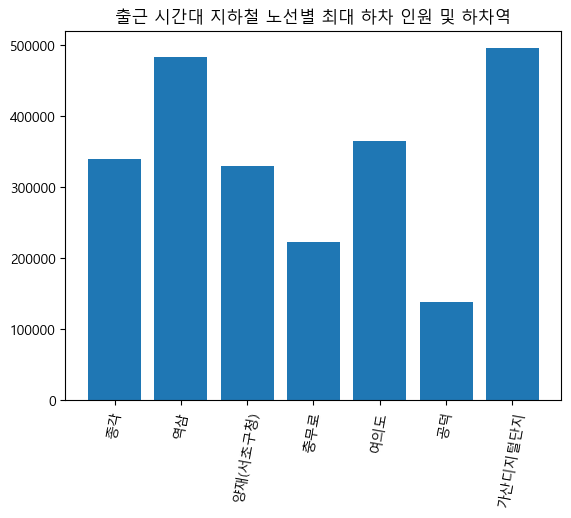

In [550]:
result = []*7
result_xticks = []*7
import matplotlib.pyplot as plt

if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font',family = 'AppleGothic')
for x in range(7):
    result.append(max_df.합계[x])
    result_xticks.append(max_df.지하철역[x])
    
for x in range(7):
    print(f"출근 시간대 {max_df.호선명[x]} 최대 하차역: {max_df.지하철역[x]}, 하차인원: {max_df.합계[x]:,}명")

plt.figure(dpi=100)
plt.bar(range(7), result)
plt.xticks(range(7), result_xticks, rotation=80)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()

가산디지털단지 : 696,232
여의도 : 674,239
선릉 : 576,574
서울역 : 551,188
시청 : 531,382


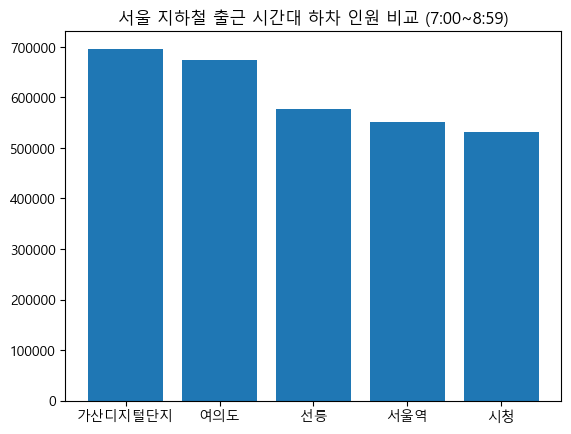

In [551]:
rank_df = df1.groupby(by='지하철역').sum().sort_values('합계',ascending=False).head()
for x in range(5):
    print(rank_df.index[x],':',end=" ")
    print(format(rank_df.합계[x], ',d'))
    
plt.figure(dpi=100)
plt.bar(rank_df.index,rank_df.합계)
plt.title('서울 지하철 출근 시간대 하차 인원 비교 (7:00~8:59)')
plt.show()